In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os
from itertools import product, combinations

from paths import *
from ssd_paths import *
from misc_recorder import *

In [2]:
hyper_dir = model_save_
ts = "0206170859"
plot_save_place = "./plots/"

In [11]:
class ResReader: 
    def __init__(self, dir, runtype="ff", cv="full"):
        self.dir = dir
        self.runtype = runtype
        self.cv = cv
    
    def read(self):
        read_dir = os.path.join(self.dir, self.cv, self.runtype)
        train = ListRecorder(os.path.join(read_dir, 'train.acc'))
        valid = ListRecorder(os.path.join(read_dir, f'valid.acc'))
        fullvalid = ListRecorder(os.path.join(read_dir, f'full_valid.acc'))
        trainlikevalid = ListRecorder(os.path.join(read_dir, f'trainlikevalid.acc'))
        train.read()
        valid.read()
        fullvalid.read()
        trainlikevalid.read()
        return train.get(), valid.get(), fullvalid.get(), trainlikevalid.get()

In [12]:
def draw(reses, y_label="Accuracy", title=""): 
    data = list(reses.values())

    # Function to calculate mean and 95% CI
    def mean_confidence_interval(data, confidence=0.95):
        n = len(data)
        mean = np.mean(data)
        sem = stats.sem(data)
        margin = sem * stats.t.ppf((1 + confidence) / 2., n-1)
        return mean, margin

    # Calculate means and CIs
    means = [mean_confidence_interval(group)[0] for group in data]
    cis = [mean_confidence_interval(group)[1] for group in data]

    # Plotting
    fig, ax = plt.subplots()
    x_pos = np.arange(len(data))
    ax.bar(x_pos, means, yerr=cis, align='center', alpha=0.7, ecolor='black', capsize=10)
    ax.set_ylabel(y_label)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(reses.keys())
    ax.set_title(title)
    ax.yaxis.grid(True)

    # Show the plot
    plt.tight_layout()
    # plt.show()
    plt.savefig(os.path.join(plot_save_place, f"{ts}-{title}.png"))

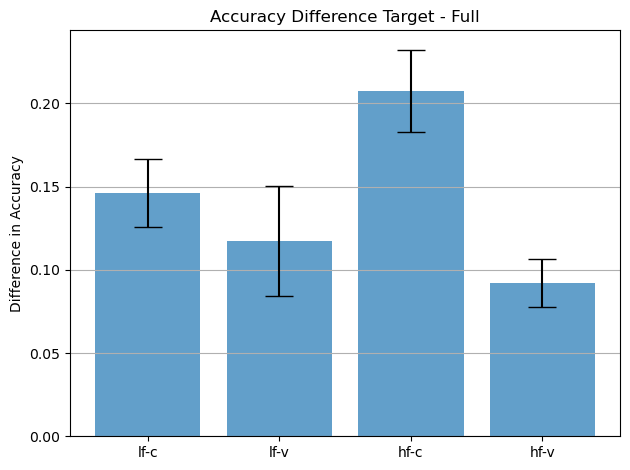

In [13]:
# TFD
reses = {}
for run_case in range(1, 11): 
    dir = os.path.join(hyper_dir, f"H18-{ts}-{run_case}", "large")
    for runtype, cv in list(product(["lf", "hf"], ["c", "v"])):
        res = ResReader(dir, runtype=runtype, cv=cv).read()
        val = np.mean([x - y for x, y in zip(res[1], res[2])][15:20])
        # val = np.mean(res[2][35:40])
        if f"{runtype}-{cv}" in reses.keys(): 
            reses[f"{runtype}-{cv}"].append(val)
        else: 
            reses[f"{runtype}-{cv}"] = [val]

draw(reses, "Difference in Accuracy", "Accuracy Difference Target - Full")

In [6]:
for a, b in list(combinations(reses.keys(), 2)): 
    print(a, b, stats.ttest_ind(reses[a], reses[b]))

lf-c lf-v TtestResult(statistic=1.6847511569139706, pvalue=0.10929584768164316, df=18.0)
lf-c hf-c TtestResult(statistic=-4.3210298527999615, pvalue=0.00041146350691890154, df=18.0)
lf-c hf-v TtestResult(statistic=4.909276855777609, pvalue=0.0001130279923437477, df=18.0)
lf-v hf-c TtestResult(statistic=-4.937577966894762, pvalue=0.00010629070536877993, df=18.0)
lf-v hf-v TtestResult(statistic=1.5874059190707845, pvalue=0.1298312485960577, df=18.0)
hf-c hf-v TtestResult(statistic=9.06483312108693, pvalue=3.957380612049293e-08, df=18.0)


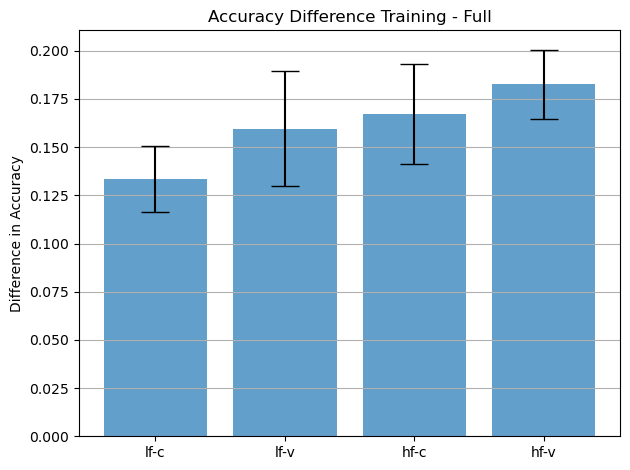

In [15]:
# TrainFD
reses = {}
for run_case in range(1, 11): 
    dir = os.path.join(hyper_dir, f"H18-{ts}-{run_case}", "large")
    for runtype, cv in list(product(["lf", "hf"], ["c", "v"])):
        res = ResReader(dir, runtype=runtype, cv=cv).read()
        val = np.mean([x - y for x, y in zip(res[3], res[2])][15:20])
        # val = np.mean(res[2][35:40])
        if f"{runtype}-{cv}" in reses.keys(): 
            reses[f"{runtype}-{cv}"].append(val)
        else: 
            reses[f"{runtype}-{cv}"] = [val]

draw(reses, "Difference in Accuracy", "Accuracy Difference Training - Full")

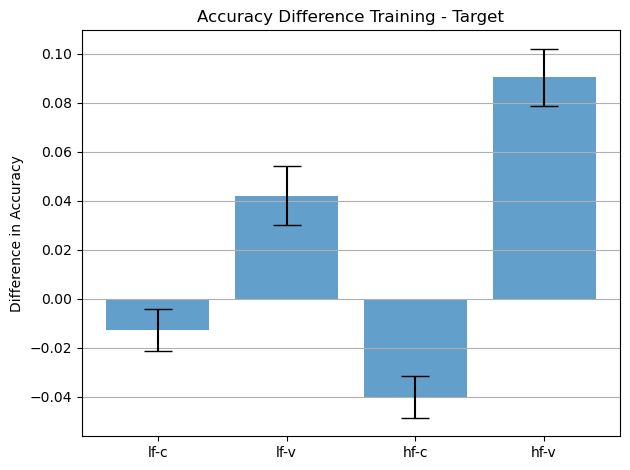

In [23]:
# TrainTD
reses = {}
for run_case in range(1, 11): 
    dir = os.path.join(hyper_dir, f"H18-{ts}-{run_case}", "large")
    for runtype, cv in list(product(["lf", "hf"], ["c", "v"])):
        res = ResReader(dir, runtype=runtype, cv=cv).read()
        val = np.mean([x - y for x, y in zip(res[3], res[1])][15:20])
        # val = np.mean(res[2][35:40])
        if f"{runtype}-{cv}" in reses.keys(): 
            reses[f"{runtype}-{cv}"].append(val)
        else: 
            reses[f"{runtype}-{cv}"] = [val]

draw(reses, "Difference in Accuracy", "Accuracy Difference Training - Target")

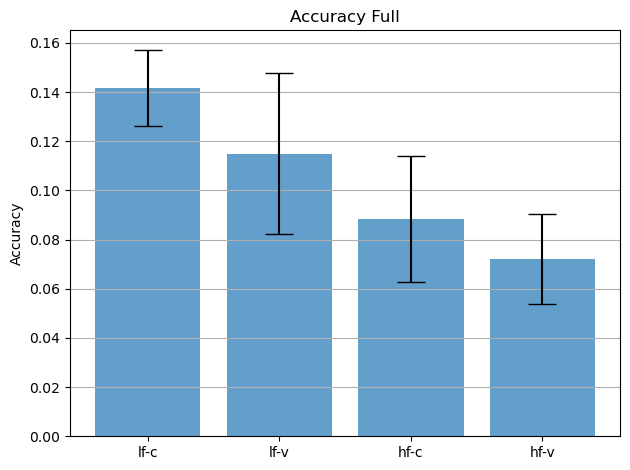

In [24]:
# FA
reses = {}
for run_case in range(1, 11): 
    dir = os.path.join(hyper_dir, f"H18-{ts}-{run_case}", "large")
    for runtype, cv in list(product(["lf", "hf"], ["c", "v"])):
        res = ResReader(dir, runtype=runtype, cv=cv).read()
        # val = np.mean([x - y for x, y in zip(res[0], res[2])][15:20])
        val = np.mean(res[2][15:20])
        if f"{runtype}-{cv}" in reses.keys(): 
            reses[f"{runtype}-{cv}"].append(val)
        else: 
            reses[f"{runtype}-{cv}"] = [val]

draw(reses, "Accuracy", "Accuracy Full")

In [25]:
for a, b in list(combinations(reses.keys(), 2)): 
    print(a, b, stats.ttest_ind(reses[a], reses[b]))

lf-c lf-v TtestResult(statistic=1.67597222468727, pvalue=0.11102630485441015, df=18.0)
lf-c hf-c TtestResult(statistic=4.037077905170985, pvalue=0.0007732729494464943, df=18.0)
lf-c hf-v TtestResult(statistic=6.598034017827354, pvalue=3.390276545894533e-06, df=18.0)
lf-v hf-c TtestResult(statistic=1.4485109150002071, pvalue=0.1646707923208732, df=18.0)
lf-v hf-v TtestResult(statistic=2.598055426993038, pvalue=0.018173509304927747, df=18.0)
hf-c hf-v TtestResult(statistic=1.1804442544928253, pvalue=0.25318829499941725, df=18.0)


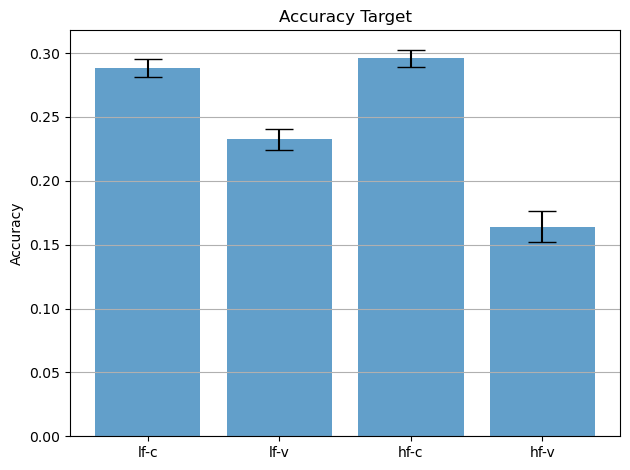

In [19]:
# TA
reses = {}
for run_case in range(1, 11): 
    dir = os.path.join(hyper_dir, f"H18-{ts}-{run_case}", "large")
    for runtype, cv in list(product(["lf", "hf"], ["c", "v"])):
        res = ResReader(dir, runtype=runtype, cv=cv).read()
        # val = np.mean([x - y for x, y in zip(res[0], res[2])][15:20])
        val = np.mean(res[1][15:20])
        if f"{runtype}-{cv}" in reses.keys(): 
            reses[f"{runtype}-{cv}"].append(val)
        else: 
            reses[f"{runtype}-{cv}"] = [val]

draw(reses, "Accuracy", "Accuracy Target")

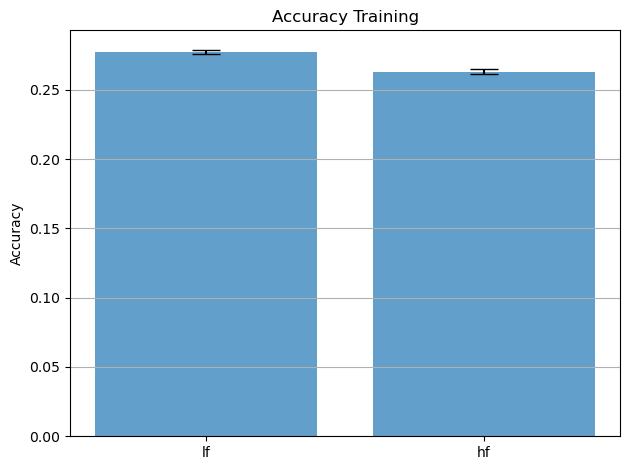

In [20]:
# TA
reses = {}
for run_case in range(1, 11): 
    dir = os.path.join(hyper_dir, f"H18-{ts}-{run_case}", "large")
    for runtype, cv in list(product(["lf", "hf"], ["c", "v"])):
        res = ResReader(dir, runtype=runtype, cv=cv).read()
        # val = np.mean([x - y for x, y in zip(res[0], res[2])][15:20])
        val = np.mean(res[0][15:20])
        if f"{runtype}" in reses.keys(): 
            reses[f"{runtype}"].append(val)
        else: 
            reses[f"{runtype}"] = [val]

draw(reses, "Accuracy", "Accuracy Training")

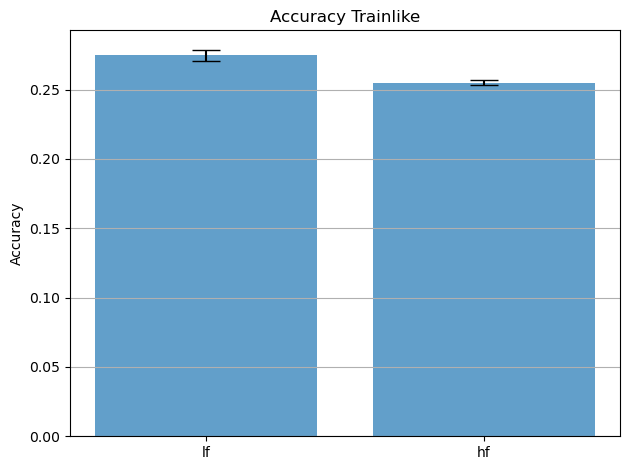

In [21]:
# TA
reses = {}
for run_case in range(1, 11): 
    dir = os.path.join(hyper_dir, f"H18-{ts}-{run_case}", "large")
    for runtype, cv in list(product(["lf", "hf"], ["c", "v"])):
        res = ResReader(dir, runtype=runtype, cv=cv).read()
        # val = np.mean([x - y for x, y in zip(res[0], res[2])][15:20])
        val = np.mean(res[3][15:20])
        if f"{runtype}" in reses.keys(): 
            reses[f"{runtype}"].append(val)
        else: 
            reses[f"{runtype}"] = [val]

draw(reses, "Accuracy", "Accuracy Trainlike")